In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2, os
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

In [4]:
drive = pd.read_csv('../../../../../source/repos/Car_Project/How_to_simulate_a_self_driving_car/data/driving_log_01.csv', names=['center','left','right','steering', 'throttle', 'reverse', 'speed'])

In [225]:
drive.steering.quantile(q=[0.07,0.092,0.1,0.15,0.2,0.25,0.26,0.27,0.89,0.9,0.91,0.92,0.93,0.935,0.936,0.937,0.938])

0.070   -1.0000
0.092   -0.9968
0.100   -0.8700
0.150   -0.4500
0.200   -0.2500
0.250   -0.0500
0.260   -0.0500
0.270    0.0000
0.890    0.0000
0.900    0.1400
0.910    0.3000
0.920    0.5320
0.930    0.7780
0.935    0.9010
0.936    0.9456
0.937    0.9902
0.938    1.0000
Name: steering, dtype: float64

In [32]:
import random
list_Size = 447
# random float from 1 to 99.9
integer_list = random.sample(range(-447, 447), list_Size)
float_list = [round(x/447,2) for x in integer_list]
y_pred = pd.Series(float_list)

In [6]:
drive.steering.value_counts().sort_index()

-1.00     42
-0.90      2
-0.90      1
-0.85      2
-0.80      2
-0.70      3
-0.65      2
-0.60      5
-0.55      1
-0.50      4
-0.50      1
-0.45      6
-0.40      8
-0.35      3
-0.30      6
-0.25      6
-0.20      9
-0.15      2
-0.10      5
-0.10      1
-0.05      6
 0.00    281
 0.10      4
 0.20      1
 0.25      1
 0.30      3
 0.40      1
 0.45      2
 0.50      1
 0.60      2
 0.65      1
 0.70      1
 0.80      1
 0.85      1
 0.90      1
 1.00     29
Name: steering, dtype: int64

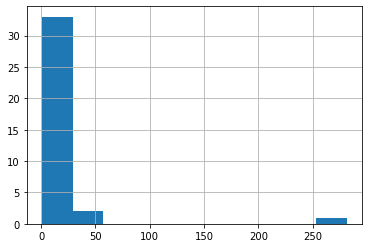

In [227]:
drive.steering.value_counts().sort_index().hist();

### 

In [74]:
import random
list_Size = 447
# random float from 1 to 99.9
integer_list = random.sample(range(-447, 447), list_Size)
float_list = [round(x/447,2) for x in integer_list]
y_pred = pd.Series(float_list)

In [81]:
y_pred.value_counts().sort_index()

-0.99    3
-0.98    5
-0.97    2
-0.96    3
-0.95    2
        ..
 0.96    3
 0.97    4
 0.98    3
 0.99    1
 1.00    1
Length: 194, dtype: int64

In [144]:
def custom_loss(y_true, y_pred):
    # These deltas looked like nodes in the steering angle train data
    deltas = [ 0.0, 0.2, 0.4, 0.6 ]
    # Select which delta
    delta = deltas[1]
    # For readability
    resids = y_pred - y_true
    sqr_resids = resids*resids
    abs_resids = abs(resids)
    # Residuals smaller than delta quadratic loss
    loss_h = np.float64(0)
    for i in range(len(y_pred)):
        if abs_resids[i] <= delta:
            loss_h += 0.5*sqr_resids[i]
        # Residuals larger than delra linear loss
        else:
            loss_h += (abs_resids[i] - 0.5*delta)*delta
    # Loss "h" if we want to discuss multiple loss-functions
    return loss_h/len(y_pred)

In [145]:
custom_loss(drive.steering, y_pred)

0      0.0625
1      0.0196
2      0.9216
3      0.4356
4      0.0900
        ...  
442    0.1296
443    0.4624
444    0.1849
445    1.0404
446    0.5776
Length: 447, dtype: float64


0.10663333434899329

In [ ]:
# CREDIT: DIRECT FROM GA NOTES, DAN- LESSON 7p04 CNN
# Visualize accuracy scores of model after trained on data
def plot_loss(history, model_name):
    train_loss = history.history['loss'] 
    test_loss = history.history['val_loss'] 
    epoch_labels = history.epoch 
    # Set figure size
    plt.figure(figsize=(12, 8)) 
    # Generate line plot of training, testing loss over epochs
    plt.plot(train_loss, label='Training Loss', color='#185fad') 
    plt.plot(test_loss, label='Validation Loss', color='orange') 
    # Set title
    plt.title(f'Model: {model_name}\nTrain & Validation Loss by Epoch', fontsize=25) 
    plt.xlabel('Epoch', fontsize=18) 
    plt.ylabel('Categorical Crossentropy', fontsize=18) 
    plt.xticks(epoch_labels, epoch_labels)
    plt.legend(fontsize=18);